In [1]:
import control
import sympy
import numpy as np
import matplotlib.pyplot as plt
sympy.init_printing()

## Original System

In [2]:
s = control.tf([1, 0], [0, 1])

In [3]:
G = 1/((s+2)*s)
G


    1
---------
s^2 + 2 s

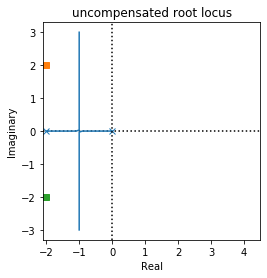

In [4]:
control.rlocus(G, np.linspace(0, 10, 1000));
plt.title('uncompensated root locus')
sd = -2 + 2j

plt.plot(np.real(sd), np.imag(sd), 's')
plt.plot(np.real(sd), -np.imag(sd), 's')
plt.axis('square')

1 states have been removed from the model


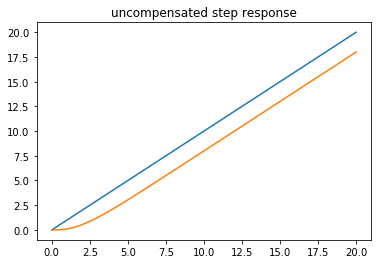

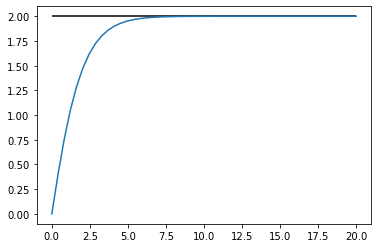

In [5]:
Gc = G/(1+G)
t, y = control.step_response(Gc/s, T=np.linspace(0, 20));
plt.plot(t, t)
plt.plot(t, y)
plt.title('uncompensated step response')

Kv = np.real((control.minreal(s*G).horner(0))[0, 0])
Kv

plt.figure()
t, y = control.step_response(Gc/s, T=np.linspace(0, 20));
plt.plot(t, t-y)
plt.hlines(1/Kv, 0, 20)

## Lead Compensator

In [6]:
#np.rad2deg(np.angle(G.horner(sd)[0,0]))

In [7]:
#phi = (-180 - np.rad2deg(np.angle(G.horner(sd)[0,0])))
#phi

In [8]:
H_lead = 8*(s+2)/(s+4)
H_lead


8 s + 16
--------
  s + 4

Text(0.5, 1.0, 'lead compensated root locus')

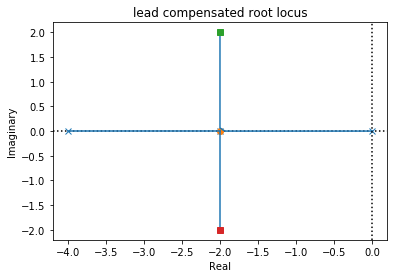

In [9]:
control.rlocus(
    G*H_lead, np.linspace(0, 1, 1000));
plt.plot(-2, 2, 's')
plt.plot(-2, -2, 's')
plt.title('lead compensated root locus')

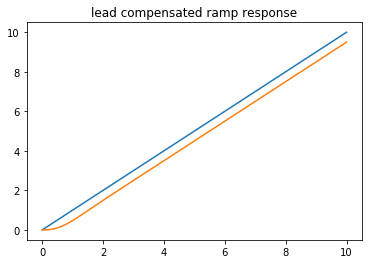

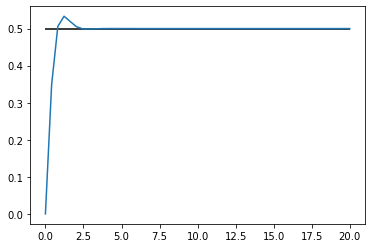

In [10]:
Gc_lead = G*H_lead/(1+G*H_lead)
t, y = control.step_response(Gc_lead/s, T=np.linspace(0, 10));
plt.plot(t, t)
plt.plot(t, y)
plt.title('lead compensated ramp response')

plt.figure()
t, y = control.step_response(Gc_lead/s, T=np.linspace(0, 20));
plt.plot(t, t-y)
plt.hlines(0.5, 0, 20)

## Lead-Lag Compensator

In [11]:
H_lag = (s+0.05)/(s+0.01)
H_lag


s + 0.05
--------
s + 0.01

In [12]:
H = H_lag*H_lead

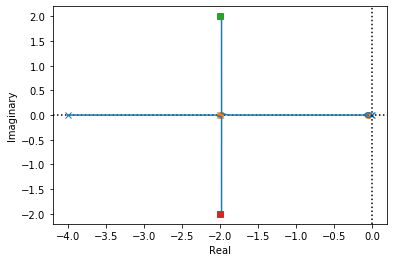

In [13]:
control.rlocus(G*H, np.linspace(0, 1, 1000));
plt.plot(-2, 2, 's')
plt.plot(-2, -2, 's')

In [14]:
control.minreal(G*H_lead*s).horner(0)

2 states have been removed from the model


array([[2.+0.j]])

In [15]:
control.minreal(G*H*s).horner(0)

2 states have been removed from the model


array([[10.+0.j]])

Text(0.5, 1.0, 'lead-lag compensated ramp response error')

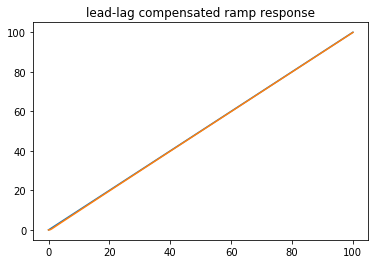

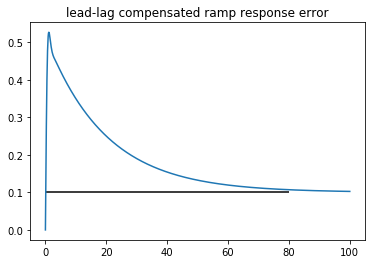

In [16]:
Gc_leadlag = G*H/(1+G*H)
t, y = control.step_response(Gc_leadlag/s, T=np.linspace(0, 100, 1000));
plt.plot(t, t)
plt.plot(t, y)
plt.title('lead-lag compensated ramp response')

plt.figure()
plt.plot(t, t - y)
plt.hlines(0.1, 0, 80)
plt.title('lead-lag compensated ramp response error')